In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn.datasets import load_boston

In [3]:
boston = load_boston()

In [4]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [6]:
df = pd.DataFrame(boston['data'], columns=boston.feature_names)

In [7]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null float64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
dtypes: float64(13)
memory usage: 51.5 KB


In [9]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [10]:
X = df

In [11]:
y = boston['target']

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((404, 13), (102, 13), (404,), (102,))

In [29]:
from sklearn.metrics import mean_squared_error, explained_variance_score, r2_score
def plot_prediction_analysis(y, y_pred, figsize=(10,8), title=" "):
    fig, axs = plt.subplots(1,2, figsize=figsize)
    axs[0].scatter(y, y_pred)
    mn = min(np.min(y), np.min(y_pred))
    mx = max(np.max(y), np.max(y_pred))
    axs[0].plot([mn, mx],[mn,mx], c='red')
    axs[0].set_xlabel('$y$')
    axs[0].set_ylabel('$\hat{y}$')
    rmse = np.sqrt(mean_squared_error(y,y_pred))
    evs = explained_variance_score(y, y_pred)
    r2 = r2_score(y, y_pred)
    axs[0].set_title('rmse:{:.4f}, evs={:.4f}, r2_score:{:.4f}'.format(rmse,evs,r2))
    
    axs[1].hist(y-y_pred, bins=50)
    avg = np.mean(y-y_pred)
    std = np.std(y-y_pred)
    axs[1].set_xlabel('$h-\hat{h}$')
    axs[1].set_title('Histogram prediction error $\mu$={:.4f}, $\sigma$={:.4f}'.format(avg, std))
    
    if title!='':
        fig.suptitle(title)

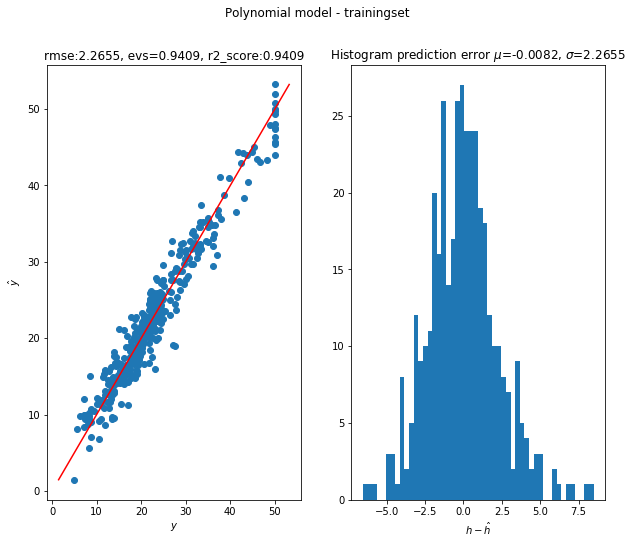

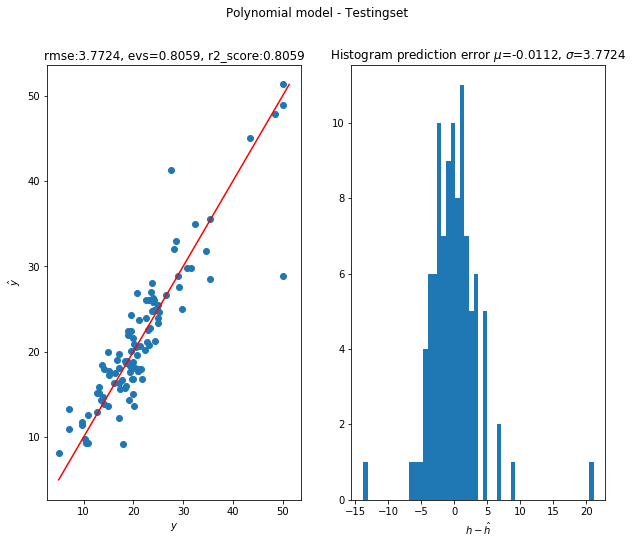

In [31]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures, StandardScaler

model = LinearRegression()

model = Pipeline((
                    ('Standared_scaler', StandardScaler()),
                    ('poly', PolynomialFeatures(degree=2)),
                    ('lin_reg',LinearRegression())
                ))
model.fit(X_train,y_train)
y_train_pred = model.predict(X_train)
plot_prediction_analysis(y_train, y_train_pred, title='Polynomial model - trainingset')
y_test_pred = model.predict(X_test)
plot_prediction_analysis(y_test, y_test_pred, title='Polynomial model - Testingset')

In [33]:
y_test_pred=model.predict(X_test)

In [37]:
print("RMSE:\t{:.4f}".format(np.sqrt(mean_squared_error(y_test, y_test_pred))))

RMSE:	18.6028


In [38]:
model1 = LinearRegression()

In [40]:
model1 = Pipeline((
                    ('Standard_scaler', StandardScaler()),
                    ('poly', PolynomialFeatures(degree=2)),
                    ('lin_reg', LinearRegression())
                ))

In [41]:
model1.fit(X_train,y_train)

Pipeline(memory=None,
     steps=[('Standard_scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('poly', PolynomialFeatures(degree=2, include_bias=True, interaction_only=False)), ('lin_reg', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False))])

In [42]:
y_train_pred = model1.predict(X_train)

In [50]:
print("R2 Score:\t{:.4f}".format(r2_score(y_train, y_train_pred)))
print("RSE:\t\t{:.4f}".format(mean_squared_error(y_train, y_train_pred)))
print("RMSE:\t\t{:.4f}".format(np.sqrt(mean_squared_error(y_train, y_train_pred))))

R2 Score:	0.9409
RSE:		5.1324
RMSE:		2.2655


In [44]:
y_test_pred = model1.predict(X_test)

In [52]:
print("R2 Score:\t{:.4f}".format(r2_score(y_test, y_test_pred)))
print("RSE:\t\t{:.4f}".format(mean_squared_error(y_test, y_test_pred)))
print("RMSE:\t\t{:.4f}".format(np.sqrt(mean_squared_error(y_test, y_test_pred))))

R2 Score:	0.8059
RSE:		14.2309
RMSE:		3.7724


# Here, we got the RMSE value till 3.77